In [1]:
import plotly.express as px
import pandas as pd 
import numpy as np
import plotly.io as pio
pio.renderers.default = 'vscode'
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [2]:
df_title_basics_clean = pd.read_csv('datasets_nettoye/df_title_basics_clean.csv', sep=',')

In [2]:
filtered_movies_principale = pd.read_csv('datasets_nettoye/filtered_movies_principale.csv',sep = ",")

In [4]:
filtered_movies_principale_exploded = pd.read_csv('datasets_nettoye/filtered_movies_principale_exploded.csv',sep = ",")

In [31]:
total_titles = df_title_basics_clean['tconst'].nunique()
print(f'nombre total de titres , tous types confondus : {total_titles}')

nombre total de titres , tous types confondus : 9882589


In [32]:
total_movies = df_title_basics_clean[df_title_basics_clean['titleType'] == 'movie']['tconst'].nunique()
print(f'Nombre total de films : {total_movies}')

Nombre total de films : 595942


In [33]:
df_title_basics_clean['genres'] = df_title_basics_clean['genres'].apply(lambda x: x.split(',') if pd.notna(x) else [np.nan])

In [ ]:
df_exploded = df_title_basics_clean.explode('genres')

In [5]:
genres_counts = df_exploded['genres'].value_counts().reset_index()
genres_counts.columns = ['Genre', 'Nombre de films']
print(genres_counts)

          Genre  Nombre de films
0         Drama          3190640
1        Comedy          2214199
2     Talk-Show          1397688
3         Short          1207115
4   Documentary          1078361
5          News          1064013
6       Romance          1058534
7        Family           837192
8    Reality-TV           632060
9     Animation           563702
10       Action           465939
11        Crime           465446
12    Adventure           429346
13    Game-Show           426890
14        Music           422293
15        Adult           359115
16        Sport           278721
17      Fantasy           236416
18      Mystery           227442
19       Horror           205425
20     Thriller           187503
21      History           168012
22    Biography           121288
23       Sci-Fi           117915
24      Musical            92579
25          War            38985
26      Western            31066
27    Film-Noir              868


In [11]:
fig = px.treemap(
    genres_counts,
    path=['Genre'],  
    values='Nombre de films',  
    title='Treemap des genres les plus populaires',
    color='Nombre de films',  
    color_continuous_scale='Viridis' 
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [35]:
type_counts = df_title_basics_clean['titleType'].value_counts().sort_values(ascending=False)

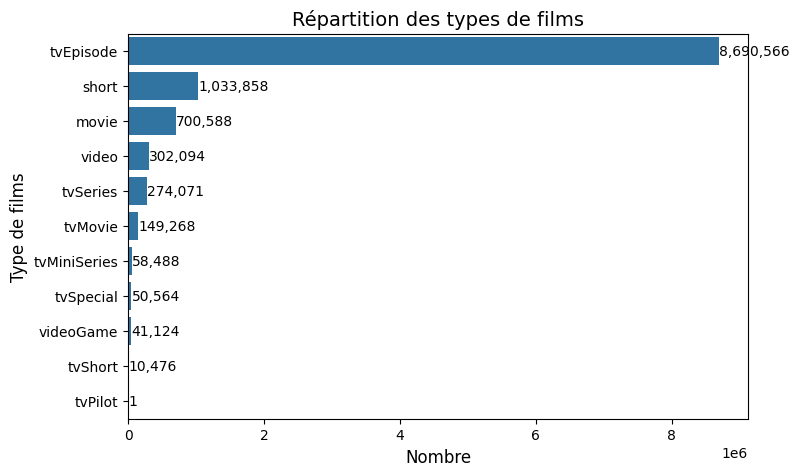

In [29]:
#Nombre de films par type (titleType).
plt.figure(figsize=(8, 5))
ax= sns.countplot(data=df_title_basics_clean, y='titleType', order=type_counts.index)
# Ajouter les annotations (valeurs exactes)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v):,}" for v in container.datavalues], label_type='edge', fontsize=10)
plt.xlabel('Nombre', fontsize=12)
plt.ylabel('Type de films', fontsize=12)
plt.title('Répartition des types de films', fontsize=14)
plt.show()

In [39]:
# a voir le type de 'startYear' avant de executer : 
df_title_basics_clean['startYear']= df_title_basics_clean['startYear'].astype('Int64')

In [50]:
#df_title_basics_clean['Decade'] = (df_title_basics_clean['startYear']//10)*10

In [150]:
df_title_basics_clean['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [58]:
films_per_decade= df_title_basics_clean['Decade'].value_counts().sort_index()

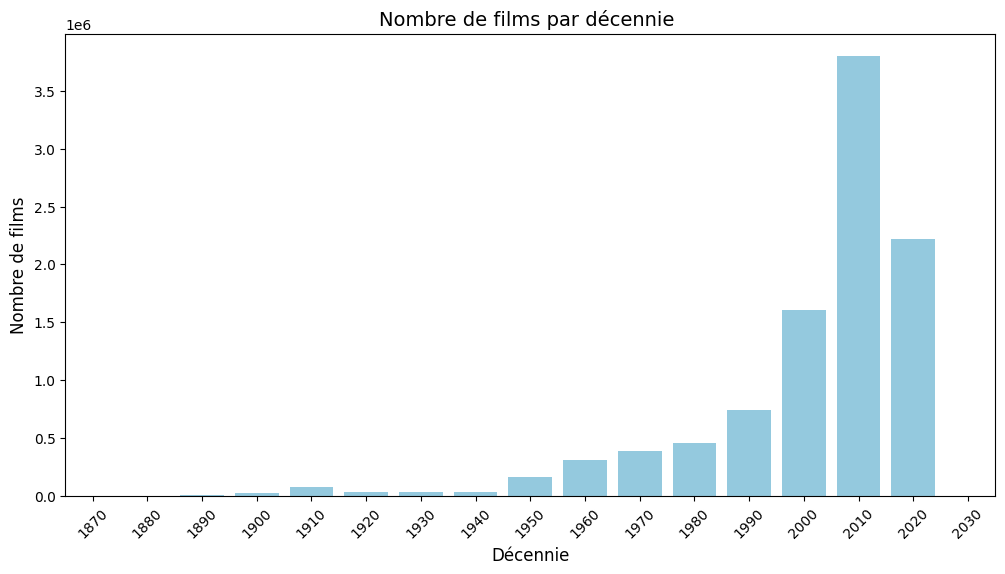

<Figure size 640x480 with 0 Axes>

In [60]:
# tendances de production de films au fil des décennies
plt.figure(figsize=(12, 6))
sns.barplot(x=films_per_decade.index, y=films_per_decade.values, color= "skyblue")
plt.title("Nombre de films par décennie ", fontsize=14)
plt.xlabel("Décennie", fontsize=12)
plt.ylabel("Nombre de films", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()
plt.tight_layout()  

In [70]:
#durée moyenne par type de films 
average_runtime_by_titleType = df_title_basics_clean.groupby('titleType')['runtimeMinutes'].mean().reset_index()
fig =px.bar(average_runtime_by_titleType, x='titleType', y='runtimeMinutes',
title= "Durée moyenne des films par type",
labels={'titleType': "Type de film", 'runtimeMinutes': "Durée moyenne (minutes)"},
color = 'titleType',template="plotly_white")
fig.show()

In [168]:
# Compter le nombre de productions par type chaque année : 
df_title_basics_clean.groupby(['startYear', 'titleType'])['tconst'].count().reset_index()

,startYear,titleType,tconst
0,1874,short,1
1,1878,short,31
2,1881,short,22
3,1882,short,2
4,1883,short,1
...,...,...,...
978,2030,movie,1
979,2030,short,1
980,2030,tvEpisode,8
981,2030,tvMiniSeries,1


In [200]:
# quels types de films ont été les plus produits à travers le temps : 
type_trends = df_title_basics_clean.groupby(['startYear', 'titleType'])['tconst'].count().reset_index()

In [212]:
type_trends

,startYear,titleType,tconst
0,1874,short,1
1,1878,short,31
2,1881,short,22
3,1882,short,2
4,1883,short,1
...,...,...,...
945,2024,tvSeries,6956
946,2024,tvShort,17
947,2024,tvSpecial,1945
948,2024,video,4596


In [213]:
# quels types de films ont été les plus produits à travers le temps : 
fig = px.bar(
    type_trends,
    x='startYear',
    y='tconst',
    color='titleType',
    title="Distribution des types de films produits par année ",
    labels={'startYear': 'Année','tconst': 'Nombre de productions', 'titleType': 'Type de film'},
    barmode='stack',template='plotly_white'
)
fig.show()


In [211]:
#line plot
fig = px.line(
    type_trends_area,
    x='startYear',
    y='tconst',
    color='titleType',
    title="Évolution des types de films produits au fil des années",
    labels={"startYear": "Année", "tconst": "Nombre de productions", "titleType": "Type de film"},
    template="plotly_white"
)

fig.show()

In [192]:
#line plot pour chaque type 
fig = px.line(
    type_trends_area,
    x='startYear',
    y='tconst',
    color='titleType',
    facet_col='titleType',
    facet_col_wrap=3,  # Nombre de colonnes dans la grille
    title="Évolution des types de films produits au fil des années (par catégorie)",
    labels={"startYear": "Année", "tconst": "Nombre de productions", "titleType": "Type de film"},
    template="plotly_white"
)
fig.show()

Focalisation sur les 30 dernières années pour conserver la pertinence de l'étude.

In [3]:
total_movies = filtered_movies_principale['tconst'].nunique()
print(f'nombre total de films : {total_movies}')

nombre total de films : 361652


In [30]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"  

In [31]:
filtered_movies_principale = filtered_movies_principale[filtered_movies_principale['startYear'] < datetime.now().year]
year_per_films = filtered_movies_principale['startYear'].value_counts().sort_index().reset_index()

fig = px.line(
    year_per_films,
    x='startYear', 
    y='count',  
    title="Évolution des pics de production cinématographique par année",
    labels={'startYear': "Année", 'count': "Nombre total de films"},
    template="plotly_white",markers = True
)
fig.show()

In [5]:
filtered_movies_principale['genres'] = filtered_movies_principale['genres'].apply(lambda x : x.split(',') if pd.notna(x) else [np.nan])
filtered_movies_principale_exploded = filtered_movies_principale.explode('genres')
filtered_movies_principale_exploded['genres'].replace({'Music':'Musical'},inplace = True)
filtered_movies_principale_exploded['genres'] = filtered_movies_principale_exploded['genres'].apply(lambda x : x.strip().lower().capitalize())

In [ ]:
# Liste de genres uniques : 
filtered_movies_principale_exploded['genres'].unique()

array(['Action', 'Crime', 'Divers', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Documentary', 'Sport', 'Horror', 'Sci-fi', 'Musical',
       'Thriller', 'Biography', 'History', 'Adventure', 'Family',
       'Animation', 'War', 'Mystery', 'Western', 'Reality-tv', 'News',
       'Talk-show', 'Game-show'], dtype=object)

In [10]:
# Nombre de film par genres : 
genres_counts =  filtered_movies_principale_exploded['genres'].value_counts().reset_index()
genres_counts.columns = ['Genre', 'Nombre de films']
print(genres_counts)

          Genre  Nombre de films
0         Drama           125361
1   Documentary           109535
2        Comedy            61372
3      Thriller            27166
4        Action            26726
5       Romance            24977
6        Horror            24533
7        Divers            20425
8         Crime            18018
9       Musical            13503
10    Biography            13127
11    Adventure            13089
12       Family            11419
13      Mystery            11117
14      History             9871
15      Fantasy             8602
16       Sci-fi             7411
17    Animation             6728
18        Sport             5666
19          War             3403
20         News             1356
21      Western             1044
22   Reality-tv              502
23    Talk-show              179
24    Game-show               21


In [20]:
# Évolution de la popularité des genres au fil des années :
df_genres_year = filtered_movies_principale_exploded.groupby(['startYear', 'genres'])['tconst'].count().reset_index()

fig = px.scatter(
    df_genres_year,
    x='startYear',
    y='genres',
    size='tconst',
    color='genres',
    title="Popularité des genres par année",
    labels={'startYear': 'Année', 'genres': 'Genres', 'tconst': 'Nombre de films'}
)
fig.show()

In [80]:
df_genres_year = filtered_movies_principale_exploded.groupby(['startYear', 'genres']).agg(
    total_votes=('numVotes', 'sum'),
    mean_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()
df_genres_year

,startYear,genres,total_votes,mean_rating,movie_count
0,1995,Action,4533372.0,5.535163,592
1,1995,Adventure,4446593.0,5.888944,141
2,1995,Animation,1723847.0,6.437264,56
3,1995,Biography,1432785.0,6.848195,104
4,1995,Comedy,5390864.0,5.854698,742
...,...,...,...,...,...
708,2024,Sport,152389.0,7.048004,210
709,2024,Talk-show,169.0,6.756818,10
710,2024,Thriller,3121209.0,6.044413,1870
711,2024,War,130461.0,6.445627,103


In [21]:
# les genres avec la meilleure note moyenne.
filtered_movies_principale_exploded.groupby('genres')['averageRating'].mean().reset_index().sort_values( by='averageRating',ascending= False).head(3)

,genres,averageRating
16,News,7.247154
7,Documentary,7.243905
3,Biography,7.080511


In [22]:
#Calculez la durée moyenne des films par genre : 
filtered_movies_principale_exploded.groupby('genres')['runtimeMinutes'].mean().reset_index().sort_values(by ='runtimeMinutes',ascending = False)

,genres,runtimeMinutes
18,Romance,101.092640
0,Action,100.153937
5,Crime,98.350181
8,Drama,96.839241
15,Mystery,95.201515
22,Thriller,95.055223
4,Comedy,94.671778
10,Fantasy,93.062111
23,War,92.579830
1,Adventure,92.123392


cette methode permet d'identifier des films qui pourraient être de haute qualité mais peu connus ou peu votés, par contre ces films reflète moins la popularité d'un film auprès d'un large public.

In [231]:
#Films les mieux notés : Liste des films avec les meilleures notes (averageRating) et le plus grand nombre de votes (numVotes).
top_movies = filtered_movies_principale.nlargest(10, ['averageRating', 'numVotes'])

fig = px.scatter(data_frame= top_movies,
 x='numVotes',
 y='averageRating',
 text='primaryTitle',
 size='numVotes',
 color ='averageRating',
 title='Films les mieux notés en fonction des votes et des notes',
 labels = {'numVotes':'Nombre de votes','averageRating':'Note moyenne'},
 hover_data = {'startYear': True})
fig.show()

Cette methode garantit que les films les mieux notés sont aussi largement regardés et appréciés. (identifier les films populaires)

In [5]:
# Filtrer les films avec un nombre significatif de votes (numbreVote > 1000 votes)
filtered_movies_votes = filtered_movies_principale[filtered_movies_principale['numVotes'] > 1000]

# les 15 meilleurs films en fonction des votes et des notes :
top_movies = filtered_movies_votes.nlargest(15, ['averageRating', 'numVotes'])

fig = px.scatter(
    top_movies,
    x='numVotes',
    y='averageRating',
    text='primaryTitle',
    size='numVotes',
    color='averageRating',
    title='Films les mieux notés en fonction des votes significatifs (votes > 1000)',
    labels={'numVotes': 'Nombre de votes', 'averageRating': 'Rating'},
    hover_name='primaryTitle',  
    hover_data={'startYear': True},
    size_max=40  
)
fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(font=dict(size=12), title_font_size=16)
fig.show()


In [77]:
# Les 15 meilleurs genres le plus notes à partir de 1000 votes 
# Filtrer les films avec un nombre significatif de votes (numbreVote > 1000 votes)
filtered_movies_votes = filtered_movies_principale[filtered_movies_principale['numVotes'] > 1000]
top_genres_combines = (filtered_movies_votes.groupby('genres') .agg({'averageRating': 'mean','numVotes': 'sum'}).reset_index())
top_genres_combines_sorted = top_genres_combines.sort_values(by=['averageRating', 'numVotes'], ascending=False).head(15)
print(top_genres_combines_sorted)

                         genres  averageRating  numVotes
64   Action,Documentary,Mystery       8.300000   21583.0
528           Drama,Fantasy,War       8.200000  715835.0
161  Adventure,Documentary,News       8.200000    8282.0
491      Documentary,Music,News       8.200000    3275.0
645               Music,Musical       8.200000    1881.0
316             Biography,Sport       8.150000    9158.0
558         Drama,Musical,Sport       8.100000  122645.0
490   Documentary,Music,Musical       8.100000   28876.0
578             Drama,Sport,War       8.100000    5262.0
227    Animation,Comedy,Romance       8.100000    2407.0
267           Animation,Romance       8.100000    1222.0
494       Documentary,Music,War       8.033333    3786.0
611     Fantasy,Musical,Romance       8.000000   63412.0
473       Documentary,Drama,War       7.900000  134371.0
467     Documentary,Drama,Music       7.900000   17352.0


In [9]:
df_visualization = pd.read_csv("datasets_nettoye/df_visualization.csv",sep =',')

In [10]:
# Identifier les contributeur les plus actif dans les 30 dernières années : 
def contributors_plus_actif(df,category,x_label ,top_n):
    df_filered_category = df[df['category'].isin(category)]
    top_contributors = df_filered_category.groupby('primaryName')['tconst'].nunique().sort_values(ascending=False).head(top_n)
    fig = px.bar(top_contributors, x=top_contributors.index, y=top_contributors.values,
             labels={'x': x_label, 'y': "Nombre de films"},
             title=f"Top {top_n} des {x_label} les plus présents dans les films")
    fig.show()

# Identifier les acteurs ou actrices ayant participé au plus grand nombre de films :
contributors_plus_actif(df_visualization,['actor', 'actress'],"Acteurs/Actrices" ,10)
#Identifier les réalisateurs ayant produit le plus de films :  
contributors_plus_actif(df_visualization,["director"],"Réalisateurs" ,10)
# Identifier les scénaristes ayant produit le plus de films :
contributors_plus_actif(df_visualization,["writer"],"Scénaristes" ,10)



In [16]:
#identifier les contributeurs les mieux notés en fonction de la moyenne des notes et de nombre de votes des films auxquels ils ont participé :
 
def contributors_plus_note(df,category,x_label ,min_films,min_votes,top_n):
    df_filered_category = df[df['category'].isin(category)]
    df_filered_category = df_filered_category[df_filered_category['numVotes'] >= min_votes]

    # moyenne des notes des films et nombre de films par contributeur : 
    top_contributors = df_filered_category.groupby('primaryName').agg(
        num_films=('tconst', 'nunique'),avg_rating=('averageRating', 'mean')).reset_index()
    top_contributors = top_contributors[top_contributors['num_films'] >= min_films]
    # Trier par note moyenne, puis par nombre de films
    top_contributors = top_contributors.sort_values(by=['avg_rating', 'num_films'], ascending=[False, False])
    top_contributors = top_contributors.head(top_n)

    
    fig = px.bar(top_contributors, x='primaryName', y='avg_rating', text='num_films',
             labels={'x': x_label, 'y': "Note moyenne"},
             title=f"Top {top_n} des {x_label} les plus notes dans les films")
    fig.show()

# Identifier les acteurs ou actrices les mieux notés :
contributors_plus_note(df_visualization,['actor', 'actress'],"Acteurs/Actrices",min_films=30,min_votes=100,top_n=10)
#Identifier les réalisateurs les mieux notés :   
contributors_plus_note(df_visualization,["director"],"Réalisateurs",min_films=10,min_votes=100,top_n=10)
# Identifier les scénaristes les mieux notés :
contributors_plus_note(df_visualization,["writer"],"Scénaristes",min_films=10,min_votes=100,top_n=10)

#En limitant l'analyse aux contributeurs ayant travaillé sur un certain nombre de films, l'etude se concentre
# sur les indvidus les plus actifs et expérimentés dans l'industrie cinématographique. De plus 
# en prenant en compte uniquement les des films ayant une seuil des votes , cela garantit que les notes moyennes sont calculées à partir de film
# bénéficiant d'une certaine visibilité auprès du public 

In [2]:
filtered_movies_principale_tmdb = pd.read_csv('datasets_nettoye/filtered_movies_principale_tmdb.csv')

In [33]:
filtered_movies_principale_tmdb['numVotes'].describe()

count    3.616520e+05
mean     2.562783e+03
std      3.078002e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      9.700000e+01
max      2.957387e+06
Name: numVotes, dtype: float64

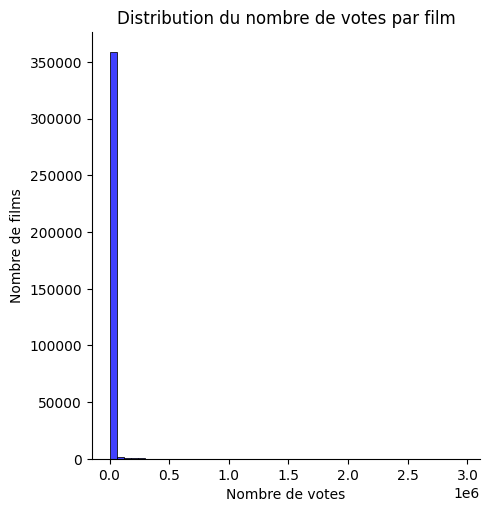

In [3]:
sns.displot(filtered_movies_principale_tmdb['numVotes'], kde=False, bins=50, color='blue')
plt.xlabel('Nombre de votes')  
plt.ylabel('Nombre de films') 
plt.title('Distribution du nombre de votes par film')
plt.show()

In [7]:
filtered_movies_principale_tmdb['averageRating'].describe()

count    361652.000000
mean          6.392383
std           1.209202
min           1.000000
25%           5.796975
50%           6.416218
75%           7.232135
max          10.000000
Name: averageRating, dtype: float64

In [57]:
# Identifier la corrélation entre le budget des films , la populartie via le nombre de votes et leur note moyenne.
fig = px.scatter(
    filtered_movies_budget,
    x='budget',
    y='averageRating',
    size='numVotes',  
    color='numVotes',  
    labels={'budget': 'Budget (en $)', 'averageRating': 'Note moyenne', 'numVotes': 'Nombre de votes'},
    title="Relation entre le budget, la note moyenne et la popularité"
)
fig.show()


In [73]:
# films dont le budget ou le revenu est = 1 , par contre l'unite pas claire peut etre 1M !
# Alors on a recupere juste les données realistes pour faire notre étude ! budget ou revenu > 1000$ 
films_with_budget_1 = filtered_movies_principale_tmdb[
    (filtered_movies_principale_tmdb['budget'] == 1) | 
    (filtered_movies_principale_tmdb['revenue'] == 1)
]
films_with_budget_1[['primaryTitle', 'budget', 'revenue']]


,primaryTitle,budget,revenue
340,Anne Frank Remembered,0.0,1.0
1962,The King of Masks,0.0,1.0
3805,Ed Mort,1.0,0.0
4129,Little Ghost,1.0,14.0
4832,Delivered,1.0,0.0
...,...,...,...
303074,Amityville: Vanishing Point,1.0,0.0
307790,The Ultimate Triathlon,1.0,0.0
326448,The Stars Look Tired,1.0,0.0
338786,Finalmente sposi,0.0,1.0


In [77]:
#Rentabilité moyenne par film : permettre d'identifier les films les plus rentables, même avec des budgets modestes

#Calculer la rentabilité comme : (revenu - budget)/budget 

## Filtrer les films avec des budgets et revenus non nan et > 0 
filtered_movies_roi = filtered_movies_principale_tmdb[
    (filtered_movies_principale_tmdb['budget'] > 1000) & 
    (filtered_movies_principale_tmdb['revenue'] > 1000)].dropna(subset=['budget','revenue'])

filtered_movies_roi['ROI'] = (filtered_movies_roi['revenue'] - filtered_movies_roi['budget']) / filtered_movies_roi['budget']
top_roi_movies = filtered_movies_roi.sort_values(by='ROI', ascending=False).head(10)
# top_roi_movies sont le film les plus rentables, ayant le ROI le plus élévé.
top_roi_movies[['originalTitle','ROI']]

,originalTitle,ROI
10120,The Blair Witch Project,1242.195495
270189,Yeki Mikhad Bahat Harf Bezane,999.000000
77283,Paranormal Activity,898.329302
339954,Kamera o tomeru na!,525.469870
312977,Secret Superstar,479.001359
31687,Super Size Me,438.616585
188475,The Gallows,428.644100
29425,Open Water,419.522723
2802,Monopol,376.871153
141161,DeMonD the movie,299.000000


In [79]:
# Graphe pour la relation entre budget et revenu
fig = px.scatter(
    filtered_movies_roi, x='budget', y='revenue',
    hover_name='primaryTitle',
    labels={'budget': 'Budget ($)', 'revenue': 'Revenu ($)'},
    title='Relation entre le budget et le revenu des films'
)
fig.show()


In [5]:
#Identifier les genres les plus lucratifs par ROI : 
genres_exploded = filtered_movies_principale_tmdb.assign(genres=filtered_movies_principale_tmdb['genres'].str.split(',')).explode('genres')

genres_exploded = genres_exploded[(genres_exploded['budget'] > 1000) & (genres_exploded['revenue'] > 0.0 )].dropna(subset=['budget','revenue']) 
genres_exploded['ROI'] = (genres_exploded['revenue'] - genres_exploded['budget']) / genres_exploded['budget']

roi_by_genre = genres_exploded.groupby('genres')['ROI'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    roi_by_genre,
    x='genres',
    y='ROI',
    labels={'genres': 'Genres', 'ROI': 'ROI moyen'},
    title="ROI moyen par genre"
)
fig.show()


In [9]:
genres_exploded = genres_exploded.drop(columns=['poster_path', 'overview'])

In [11]:
genres_exploded.to_csv('datasets_nettoye/genres_exploded.csv')